# ¿Qué es un algoritmo?

En este notebook, empezaremos en serio nuestro estudio de algoritmos computacionales.

Un **algoritmo** es una "receta" computacional, que consiste en una serie de instrucciones para que la computadora lleve a cabo un cálculo dado. Gran parte del curso consistirá en desarrollar algoritmos para calcular, de forma numérica, distintas cantidades en la física, a partir de algún modelo matemático. El campo que se ocupa de diseñar y estudiar estos algoritmos es el **análisis numérico**. Su aplicación a problemas de física se puede decir que constituye la **física computacional**.

Algunos algoritmos (por ejemplo, la eliminación gaussiana que veremos más adelante) proveen una manera de llevar a cabo un cálculo de manera "exacta" (dentro de las restricciones impuestas por el uso de números con precisión finita) en un número finito de pasos.

Sin embargo, en general, no podemos esperar que haya una fórmula analítica cerrada para calcular las cantidades de interés de manera exacta. En este caso, será necesario emplear un algoritmo **iterativo**, que en principio podría correr ¡por un tiempo infinito! Lo pararemos cuando pensemos que el problema ya se resolvió de forma "suficientemente buena".

## Algoritmos iterativos

Un **algoritmo iterativo** repite un mismo cálculo un gran número de veces, modificando un valor (o varios valores) en el proceso, hasta que (en el mejor de los casos) converja a una solución.

Un algorithmo iterativo empieza desde una adivinanza inicial $x_0$, y aplica un procedimiento / receta matemática, o sea alguna función $f$ (que puede ser complicada), para producir una siguiente adivinanza $x_1 := f(x_0)$. Esto se repite para producir una secuencia $x_0, x_1, \ldots, x_n, \ldots$, tales que

$$x_1 = f(x_0)$$
$$x_2 = f(x_1)$$
$$x_3 = f(x_2)$$

etc. En general, escribimos una iteración como 

$$x_{n+1} := f(x_n).$$

Nota que entonces tenemos $x_2 = f(f(x_0))$, luego $x_3 = f(f(f(x_0)))$, etc., así que la iteración consiste en aplicar de forma iterada la función $f$.

La idea es que diseñemos el método para que la secuencia $x_n$ que se produce *converja* hacia un valor límite $x^*$ cuando $n \to \infty$, y que el $x^*$ resultante *¡sea solución del problema original*!

Dado que no podemos llevar a cabo la iteración un número infinito de veces, se corta la iteración después de un cierto número de pasos, para dar una solución *aproximada*, que se acerca dentro de cierta *tolerancia* al resultado teórico exacto $x^*$. Por lo tanto, cualquier algoritmo iterativo requiere una condición de terminación. En muchos casos, podemos lograr que la tolerancia sea del orden de magnitud del llamado **épsilon de la máquina**, que es el número $\epsilon$ más pequeño tal que la computadora distinga $1$ de $1 + \epsilon$. Nota que esto depende de la **precisión** de los números flotantes; esto, a su vez, es consecuencia de la representación interna de los mismos, lo cual veremos más adelante en el curso.

#### Ejercicio 1 

(i) Utiliza la función `nextfloat` para encontrar el épsilon de la máquina.

(ii) Verifica lo mismo utilizando la función `eps`.

(iii) Este valor es igual a $2^{-n}$. Encuentra el valor de $n$.

(iv) Haz lo mismo para `Float32`. [Pista: Para convertir un número `x` a `Float32`, se pone `Float32(x)`.]

In [1]:
using SymPy

In [2]:
using Plots

In [3]:
using Interact

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/4a9c8ae2369e127a11b7b64da32a2252ae982524-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/4a9c8ae2369e127a11b7b64da32a2252ae982524-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [4]:
#i
n=0.2
c=nextfloat(n)-n

2.7755575615628914e-17

In [5]:
#ii
eps(n)

2.7755575615628914e-17

In [6]:
1/(2^4)

0.0625

In [7]:
#iii
function encontrar(n)
    #Float64(n)
    d=1
    c=0
    e=eps(n)
    while 1/(2^d) >= e
     c+=1
     d+=1
    end
    return c
end

encontrar (generic function with 1 method)

In [8]:
a=encontrar(0.2)

55

In [9]:
b=1/(2^a)

2.7755575615628914e-17

In [10]:
#iv
f=Float32(0.2)

0.2f0

In [11]:
eps(f)

1.4901161f-8

# Iteraciones de punto fijo

En la computadora, podríamos empezar con un arreglo vacío con cierto número de elementos, de saber cuánto durará la iteración.

Pero, en general, no sabemos cuánto durará. Por lo tanto, es más usual pensar en el **valor actual** de $x$, y el **valor siguiente** de $x$. Dentro del cuerpo del bucle, usamos el valor actual de $x$ para calcular el valor nuevo. Al final del cuerpo del bucle, debemos actualizar el "valor actual".

#### Ejercicio 2

(i) Define la función $f_1(x) = \frac{x}{2} - 1$.

(ii) Toma una condición inicial $x_0$ y lleva a cabo la iteración a mano. ¿Qué observas?

(iii) Utiliza un bucle `for` para ver cómo son los primeros $N$ iterados $x_n$. Haz una función que tome como argumento $x_0$ y $N$.

(iv) Repite la iteración para varios valores de $x_0$ y dibuja los iterados enen una sola gráfica. ¿Cuál tipo de gráfica es la más apropiada? ¿Qué observas?

(v) Si $x_{n+1} = f(x_n)$ y $x_n \to x^*$ cuando $n \to \infty$, ¿cuál ecuación satisface $x^*$? ¿Cómo podemos llamar entonces a $x^*$? Resuelva esta ecuación para $f_1$. ¿Concuerda con lo que hayas visto?

In [12]:
function F(x)
   return x/2-1
end

F (generic function with 1 method)

In [13]:
function iteracion(N,x0)
f_nuevo=x0
v=[]
for i in 1:N
   f_nuevo= F(f_nuevo)
    #@show f_nuevo
    push!(v,f_nuevo)
end
    return v
end

iteracion (generic function with 1 method)

In [14]:
v=iteracion(50,100)

50-element Array{Any,1}:
 49.0    
 23.5    
 10.75   
  4.375  
  1.1875 
 -0.40625
 -1.20313
 -1.60156
 -1.80078
 -1.90039
 -1.9502 
 -1.9751 
 -1.98755
  ⋮      
 -2.0    
 -2.0    
 -2.0    
 -2.0    
 -2.0    
 -2.0    
 -2.0    
 -2.0    
 -2.0    
 -2.0    
 -2.0    
 -2.0    

In [15]:
function ramdom(n)
    r=rand([-1,1])*rand()*n
end


ramdom (generic function with 1 method)

In [16]:
function graficar(N,n,R)
    p=plot(leg=false)

    for i in 1:N
        v=iteracion(n,ramdom(R))
        p=plot!(v)
    end
    plot(p,xlim=(1,20),ylim=(-40,40))
end
       

graficar (generic function with 1 method)

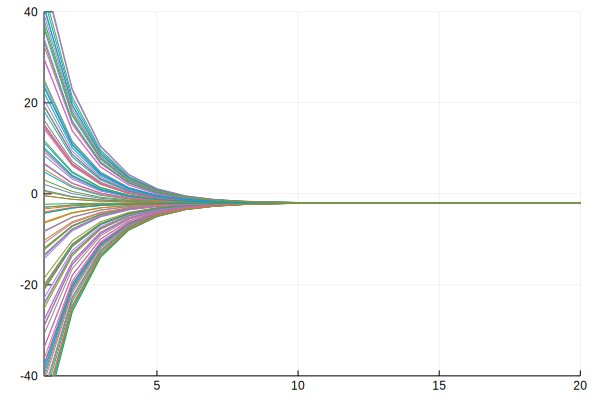

In [17]:
graficar(100,20,100)

#### Ejercicio 3

(i) Define una función `iterar` que lleva a cabo lo que hiciste en la pregunta 1. Debe aceptar como su primer argumento (el nombre de) la función `f` que iterar, así como el número de veces que se iterará, y la condición inicial. Regresa un arreglo de los iterados.

(ii) Utiliza la función para iterar la función $f_2(x) = \cos(x)$, y dibuja el resultado para distintas condiciones iniciales.

(iii) ¿Adónde converge la iteración? ¿Cuál ecuación hemos resuelto?

(iv) Utiliza `@manipulate` para tener una versión dinámica de la visualización, en la cual puedes cambiar tanto la condición inicial, como el número de iterados.

In [18]:
#i)
function iterar(g,n,x0)
    f=g(x0)
#n=50
#x0= 1
    v=[x0,f]
    for i in 1:n
        f=g(f)
        push!(v,f)
    end
    plot(v)
end
        

iterar (generic function with 1 method)

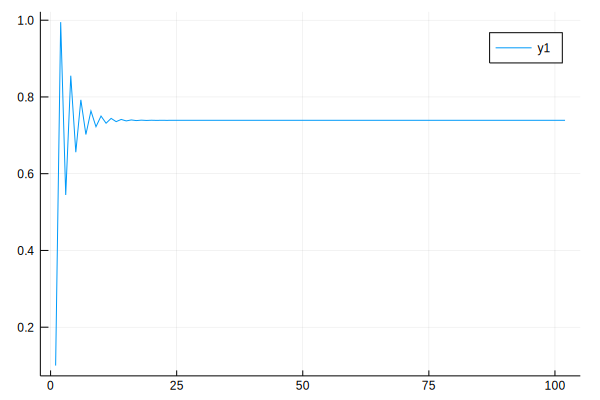

In [19]:
#ii
iterar(cos,100,0.1)


In [20]:
cos(π/4)

0.7071067811865476

In [21]:
@manipulate for n=0:3:60 , x0=0:0.5:4
    gra=iterar(cos,n,x0)
    plot(gra)
end
    

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_02", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-bbe28f2c-e48c-429c-82d9-dcf218c15091", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Any,Any}(Pair{Any,Any}(:max, 60),Pair{Any,Any}(:style, Dict{Any,Any}()),Pair{Any,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Any,Any}(:step, 3),Pair{Any,Any}(:className, "slider slider is-fullwidth"),Pair{Any,Any}(:min, 0)), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_01", 30, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/luismartinezrojas/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":30}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {

#### Ejercicio 4 

(i) ¿Qué ocurre si iteras la función $f_3(x) = 2x + 1$?

(ii) ¿Puedes adivinar cuál es una condición para que una iteración converja?

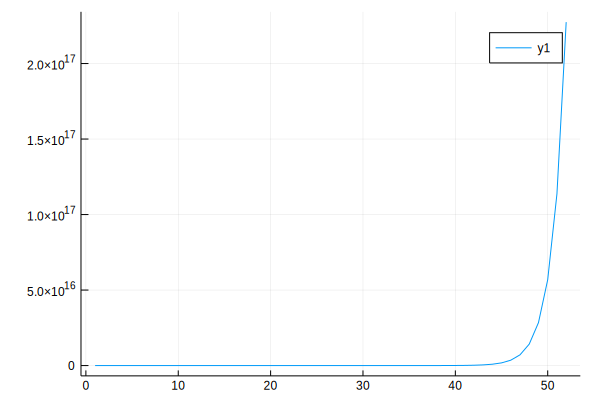

In [22]:
f2(x)=2x+1
iterar(f2,50,100)

In [23]:
@manipulate for n=0:2:100 , x0=0:3:200
    gra=iterar(f2,n,x0)
    plot(gra)
end
    

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_11", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-9e0a4322-4bfc-40e3-bedd-26bce8609992", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Any,Any}(Pair{Any,Any}(:max, 100),Pair{Any,Any}(:style, Dict{Any,Any}()),Pair{Any,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Any,Any}(:step, 2),Pair{Any,Any}(:className, "slider slider is-fullwidth"),Pair{Any,Any}(:min, 0)), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_10", 50, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/luismartinezrojas/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":50}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () 

#### Ejercicio 5

A menudo, se utiliza una iteración de este tipo para resolver ecuaciones. 

(i) Inventa una iteración de la forma $x_{n+1} = f(x_n)$ para resolver la ecuación $x^2 + x - 1 = 0$. ¿Para cuáles $x_0$ funciona? ¿A cuál solución converge?


Tenemos que tomar $x=f(x)$ y para este caso en particular será $x^2 + x - 1 =x(x+1)-1=0 \rightarrow x=\frac{1}{x+1}$ asi ya tenemos a $x=f(x)$.

(ii) Inventa otra. ¿Funciona para $x_0$ diferentes?
 
 Ahora como $x^2=xx=-x(-x)\rightarrow x=\frac{-1}{-x+1}$ tambien lo es

(iii) Nota que hay algunas iteraciones que **no converjan**. Por ejemplo, ¿qué ocurre con la iteración $x_{n+1} = 1 - x_n^2$?

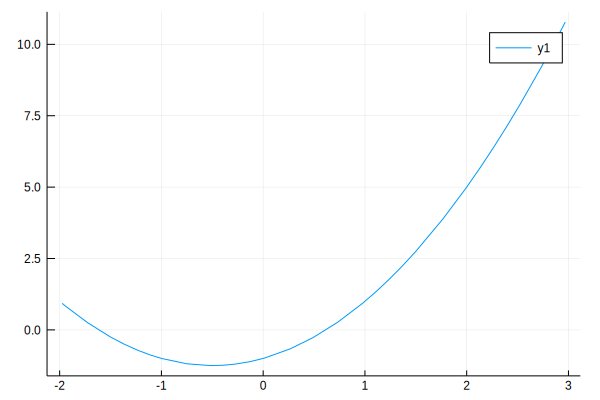

In [24]:
x=Sym("x")
plot(x^2+x-1,-2,3)


In [25]:
function ivterar(g,n,x0)
    f=g(x0)
    v=[x0,f]
    for i in 1:n
        f=g(f)
        push!(v,f)
    end
    return v
end

ivterar (generic function with 1 method)

In [26]:
#n(x)=x^2+x-1
@manipulate for x0 = -2:0.01:2 
scatter(ivterar(x->1/(x+1),100,x0))
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_20", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-0721dca2-7629-40c2-805d-8dc50ed3e329", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x0"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Any,Any}(Pair{Any,Any}(:max, 2.0),Pair{Any,Any}(:style, Dict{Any,Any}()),Pair{Any,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Any,Any}(:step, 0.01),Pair{Any,Any}(:className, "slider slider is-fullwidth"),Pair{Any,Any}(:min, -2.0)), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Float64}("ob_19", 0.0, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/luismartinezrojas/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":0.0}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(f

In [27]:
@manipulate for x0 = -2:0.01:2 
scatter(ivterar(x->-1/(-x+1),100,x0))
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_26", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-16ed2bb5-6f3a-4459-a0aa-7026409375bd", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x0"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Any,Any}(Pair{Any,Any}(:max, 2.0),Pair{Any,Any}(:style, Dict{Any,Any}()),Pair{Any,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Any,Any}(:step, 0.01),Pair{Any,Any}(:className, "slider slider is-fullwidth"),Pair{Any,Any}(:min, -2.0)), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Float64}("ob_25", 0.0, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/luismartinezrojas/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":0.0}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(f

In [28]:
#ii)
@manipulate for x0 = -20:2:20
    scatter(ivterar(x -> 1 - x^2, 40, x0))
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_32", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-2cfdf7da-5e1b-488e-8015-6a6db711b04d", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["x0"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Any,Any}(Pair{Any,Any}(:max, 20),Pair{Any,Any}(:style, Dict{Any,Any}()),Pair{Any,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Any,Any}(:step, 2),Pair{Any,Any}(:className, "slider slider is-fullwidth"),Pair{Any,Any}(:min, -20)), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_31", 0, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/luismartinezrojas/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":0}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () 

## Bucles `while`

En lo anterior, usamos un bucle `for`, que requiere que sepamos de antemano el número de iteraciones que queramos.
Sin embargo, en este tipo de problemas, es más natural esperar **hasta que** converja, sin saber cuánto tiempo tomará.

Para esto, podemos ocupar otro tipo de bucle, un bucle `while` ("mientras", en español). Un bucle de este tipo repite los comandos en el cuerpo del bucle **mientras** una condición siga cierta. Su sintaxis es como sigue:

```
while <condicion>
    [haz esto]
    [y esto]
end
```

Sin embargo, para evitar bucles infinitos, a menudo es sensato incluir un contador para que no pueda haber demasiadas (posiblemente infinitas) iteraciones.

Mientras que en un bucle `for` hay un contador que se actualiza automáticamente, en un bucle `while` **nosotros somos los responsables** de tener una variable que actúe como contador.

#### Ejercicio 5

(i) Utilice un bucle `while` para contar de 1 a 10.

(ii) Utilice un bucle `while` para encontrar la potencia de 2 más grande debajo de un número dado.

(iii) Repite lo mismo con un bucle `for`, usando la palabra clave `break` para salir del bucle cuando una cierta condición se satisfaga.

In [29]:
i=1
while i<=10
    println(i)
    i+=1
end

1


In [30]:
d=1000 #el número que del cual la potencia estará por debajo
p=0
i=1
c=0 #el contador de la potencia
while p<=d
    p=2^i
    #println(p)
    i+=1
    c+=1
end
c-1# es el numero de potencia "n" más grande debajo de nuestro número dado
#se le resta 1 porque entra un último ciclo cuando la condicion aun es valida 

9

2
3
4
5
6
7
8
9
10


In [31]:
h=9
c2=0
p2=0
for i in 1:c
    p2=2^i
    p2>d && break
    c2+=1
    
end
c2

9

## Bucles while e iteraciones de punto fijo

#### Ejercicio 6

(i) Modifica tu función `iterar` para que utilice un bucle `while` para la iteración de una función. Agrega un argumento opcional que da una **tolerancia** razonable,  y repite la iteración **hasta que** la distancia entre un iterado y el siguiente sea menor a la tolerancia. [Pista: ¿Cuál función matemática da la distancia entre dos números en una dimensión. Encuentra la función de Julia que lo hace.] 

(ii) Utiliza una iteración para resolver la ecuación $\tan(x) = x$. Dibuja la solución. ¿En qué rama de la física surge esta ecuación?

$tan(x_{n+1})=x_{n}\rightarrow tan(x_{n+1}+2 \pi k)=x_{n}\rightarrow x_{n+1}+2 \pi k=atan(x_{n}) $ y así se tiene que $x_{n+1}=atan(x_{n})+2 \pi k$

In [32]:
atan(1)

0.7853981633974483

In [33]:
function iterar2(g,x0,e)
      f=g(x0)
    v=[x0,f]
    d=1
    f0=x0
    while e<d
        f=f0
        f0=g(f)
        push!(v,f0)
        d=norm(f-f0)
        #f_viejo=f_nuevo
    end
    plot(v)
    
end

iterar2 (generic function with 1 method)

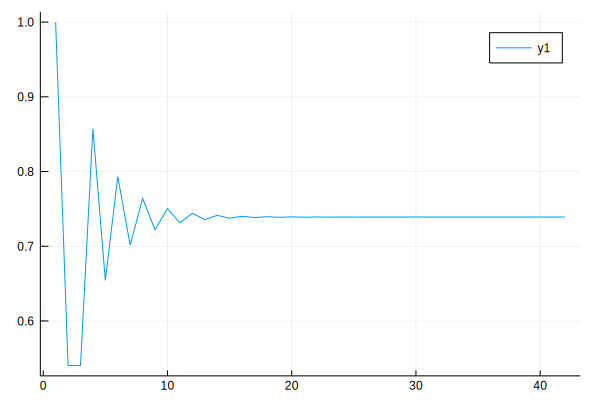

In [34]:
iterar2(cos,1,0.0000001)

In [35]:
@manipulate for k=-5:10
plot(iterar2(x->atan(x)+k*π,1,0.0011))
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_38", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-245ffadc-e0aa-4a19-b71d-4457088dc8c1", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Any,Any}(Pair{Any,Any}(:max, 10),Pair{Any,Any}(:style, Dict{Any,Any}()),Pair{Any,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Any,Any}(:step, 1),Pair{Any,Any}(:className, "slider slider is-fullwidth"),Pair{Any,Any}(:min, -5)), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Any,Any}(Pair{Any,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_37", 2, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/Users/luismartinezrojas/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/all.js", "/Users/luismartinezrojas/.julia/v0.6/InteractBase/src/../assets/style.css", "/Users/luismartinezrojas/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":2}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {r

#### Ejercicio 7

Puedes ¡hacer tu propia biblioteca de Julia!, con funciones útiles que vayas haciendo, para que ya no tengas que reescribir las mismas funciones una y otra vez.

(i) Guarda la función `iterar` en un archivo que se llama `herramientas.jl`. Iremos agregando más métodos a este archivo.

(ii) Verifica en un nuevo notebook que al poner `include("herramientas.jl")`, tienes acceso a la función `iterar`. [Nota que el notebook debe estar en el mismo directorio, o bien hay que poner la dirección competa de `herramientas.jl`.]

In [36]:
include("herramientas.jl")

iterar (generic function with 1 method)